# Modelos QSAR-SVM para protease principal 3C-like protease (M<sup>pro</sup>) de SARS-CoV

Os modelos nesse fluxo de trabalho foram criados usando as PaDEL-Descriptor, Impressões digitais de Morgan, SiRMS (Simplex Representation of Molecular Structure) e Drangon 7.0 com SVM scikit-learn.

## Importando Módulos e Funções

In [2]:
# Funções
from functions.BalanceBySim import *
from functions.DescritoresMorgan import morgan_descriptors
from functions.DescritoresPaDEL import padel_descriptors
from functions.DescritoresSiRMS import sirms_descriptors
from functions.DescritoresDragon import dragon_descriptors
from functions.stats import stats
from functions.RocAUC import roc_auc
from functions.YRandomization import y_randomization
from functions.BestModel import grid_search, random_search, best_grid_search, best_random_search
from functions.Evaluation import statistics
from functions.StatsChart import print_stats
from functions.CarregarDados import carregar_dados
from functions.Consenso import statistics_morganXpadel, statistics_sirmsXdragon
from functions.ConsensoChart import print_consenso
from functions.ComparisonHyperparameters import compare
import scipy

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

## Carregar compostos inibidores (Y)

Original data:  (113, 11)
Dados mantidos:  (113, 11)
Forma do conjunto de treinamento:

		 Classe 1: 40
		 Classe 0: 73
		 Número total de compostos: 113
Class labels: [Counter({0: 73, 1: 40})]


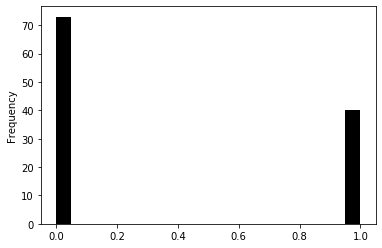

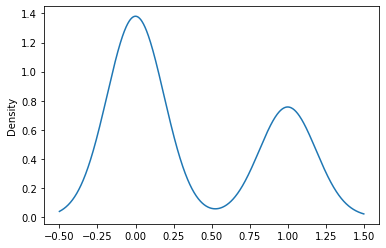

In [3]:
moldf = carregar_dados();
moldf.plot(kind="hist", legend=None, bins=20, color='k')
moldf.plot(kind="kde", legend=None);

## Gerando conjunto de treinamento e teste a partir dos descritores (X)

#### Função Fingerprints de Harry Morgan

In [4]:
data_morgan = morgan_descriptors(moldf)
Y_train_morgan = data_morgan['Y_train']
X_train_morgan = data_morgan['X_train']
X_train_morgan.shape

Forma do conjunto de treinamento:

		 Classe 1: 40
		 Classe 0: 73
		 Número total de compostos: 113
Class labels: [Counter({0: 73, 1: 40})]
Forma do conjunto de treinamento: Counter({0: 73, 1: 40})
Forma externa definida: Counter()


(113, 2048)

#### PaDEL-Descriptor

In [5]:
data_padel = padel_descriptors(moldf)
Y_train_padel = data_padel['Y_train']
X_train_padel = data_padel['X_train']
X_train_padel.shape

Forma do conjunto de treinamento: Counter({0: 73, 1: 40})
Forma externa definida: Counter()


(113, 1444)

#### SiRMS (Simplex Representation of Molecular Structure)

In [6]:
data_sirms = sirms_descriptors(moldf)
Y_train_sirms = data_sirms['Y_train']
X_train_sirms = data_sirms['X_train']
X_train_sirms.shape

(113, 1261)

#### Drangon 7.0

In [7]:
data_dragon = dragon_descriptors(moldf)
Y_train_dragon = data_dragon['Y_train']
X_train_dragon = data_dragon['X_train']
X_train_dragon.shape

(113, 377)

## Parâmetros p/ geração dos modelos

#### Parâmetros SVM

In [8]:
from scipy.stats import expon, randint
# Grade de parametros
svm_param = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "gamma": [0.1, 5, 10],
    "kernel": ['rbf', 'linear', 'poly'],
    "random_state": [24]
}

# Distribuição de parametros
svm_dist = {
    "C": randint(.001,10),
    "gamma": randint(.1,10),
    "kernel": ['rbf', 'linear', 'poly'],
    "random_state": [24]
}

## Otimizando hiperparâmetros

#### Morgan

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


**Resultados Grid Search**
Melhores Parâmetros: {'C': 0.001, 'gamma': 5, 'kernel': 'poly', 'random_state': 24}
Melhor precisão de treinamento:	 0.8237154150197629
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 218 out of 225 | elapsed:    7.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    7.2s finished


**Resultados Random Search**
Melhores Parâmetros: {'C': 6, 'gamma': 9, 'kernel': 'poly', 'random_state': 24}
Melhor precisão de treinamento:	 0.8237154150197629


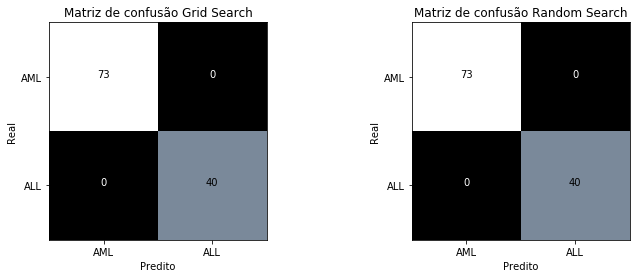

In [9]:
compare(SVC(), X_train_morgan, Y_train_morgan, svm_param, svm_dist, 'Morgan', 'SVM')

#### Sirms

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 218 out of 225 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


**Resultados Grid Search**
Melhores Parâmetros: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 24}
Melhor precisão de treinamento:	 0.7620553359683794
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 218 out of 225 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.2s finished


**Resultados Random Search**
Melhores Parâmetros: {'C': 5, 'gamma': 8, 'kernel': 'linear', 'random_state': 24}
Melhor precisão de treinamento:	 0.7620553359683794


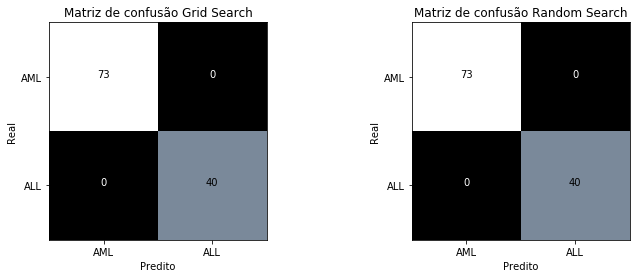

In [10]:
compare(SVC(), X_train_sirms, Y_train_sirms, svm_param, svm_dist, 'Sirms', 'SVM')

#### Dragon

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  6.8min finished


**Resultados Grid Search**
Melhores Parâmetros: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 24}
Melhor precisão de treinamento:	 0.7177865612648221
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  8.6min finished


**Resultados Random Search**
Melhores Parâmetros: {'C': 5, 'gamma': 8, 'kernel': 'linear', 'random_state': 24}
Melhor precisão de treinamento:	 0.6826086956521739


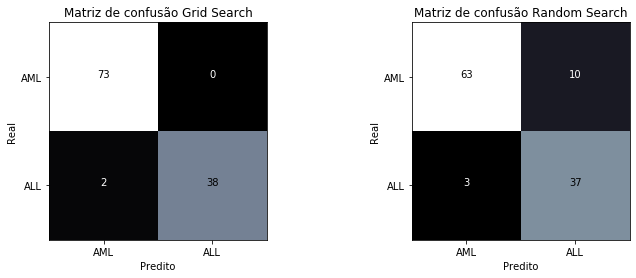

In [11]:
compare(SVC(), X_train_dragon, Y_train_dragon, svm_param, svm_dist, 'Dragon', 'SVM')

#### Padel

In [ ]:
compare(SVC(), X_train_padel, Y_train_padel, svm_param, svm_dist, 'Padel', 'SVM')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s


## Otimizando hiperparâmetros

#### Criando modelos a partir  melhores parâmetros

In [ ]:
#criando o modelo com os melhores parametros utilizando processamento paralelo
#{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 1}
svm_best_morgan = SVC(C=0.01, gamma=0.1, random_state= 1, kernel='poly', probability=True)
#{'C': 0.0009688387165373345, 'gamma': 0.002061146340820805, 'kernel': 'linear', 'random_state': 1}
svm_best_sirms = SVC(C=0.0009688387165373345, gamma=0.002061146340820805, random_state= 1, kernel='linear', probability=True)
svm_best_dragon = SVC(C=1, gamma=1, random_state= 0, kernel='linear', probability=True)
svm_best_padel = SVC(C=1, gamma=0.9, random_state= 0, kernel='linear', probability=True)


svm_best_morgan.fit(X_train_morgan, Y_train_morgan)
svm_best_sirms.fit(X_train_sirms, Y_train_sirms)
svm_best_dragon.fit(X_train_dragon, Y_train_dragon)
svm_best_padel.fit(X_train_padel, Y_train_padel)

## Validação dos modelos

####  Área sob a curva ROC (AUC) 

In [ ]:
# n_splits: int, padrão = 5 Número de dobras. Deve ser pelo menos 2.
cross_val = StratifiedKFold(n_splits=5)

In [ ]:
roc_auc(svm_best, cross_val, X_train, y_train)

####  Estatisiticas e AD

In [ ]:
data_stats_morgan = statistics(svm_best_morgan, X_train_morgan, Y_train_morgan, cross_val, data_morgan['moldf_desc'], data_morgan['moldf_train'], 'Morgan')
stats_morgan = data_stats_morgan['stats']
five_fold_morgan = data_stats_morgan['five_fold']
stats_morgan

In [ ]:
data_stats_sirms = statistics(svm_best_sirms, X_train_sirms, Y_train_sirms, cross_val, data_sirms['moldf_desc'], data_sirms['moldf_train'], 'Sirms')
stats_sirms = data_stats_sirms['stats']
five_fold_sirms = data_stats_sirms['five_fold']
stats_sirms

In [ ]:
data_stats_dragon = statistics(svm_best_dragon, X_train_dragon, Y_train_dragon, cross_val, data_dragon['moldf_desc'], data_dragon['moldf_train'], 'Dragon')
stats_dragon = data_stats_dragon['stats']
five_fold_dragon = data_stats_dragon['five_fold']
stats_dragon

In [ ]:
data_stats_padel = statistics(svm_best_padel, X_train_padel, Y_train_padel, cross_val, data_padel['moldf_desc'], data_padel['moldf_train'], 'Padel')
stats_padel = data_stats_padel['stats']
five_fold_padel = data_stats_padel['five_fold']
stats_padel

In [ ]:
print_stats(stats)

#### Y-randomization

In [ ]:
y_randomization(svm_best, X_train, y_train)

## Consenso

#### Obter consenso

In [ ]:
stats_consenso = statistics_consenso(moldf, five_fold_morgan, five_fold_sirms,five_fold_dragon,five_fold_padel, stats)
stats_consenso

#### Plotar consenso

In [ ]:
print_consenso(stats_consenso, 'SVM')

## Salvar modelos

### Random Forest

In [ ]:
with gzip.GzipFile('model/sars-cov-3clpro-morgan_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_morgan, f)
with gzip.GzipFile('model/sars-cov-3clpro-sirms_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_sirms, f)
with gzip.GzipFile('model/sars-cov-3clpro-dragon_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_dragon, f)
with gzip.GzipFile('model/sars-cov-3clpro-padel_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_padel, f)

### SVM

In [ ]:
with gzip.GzipFile('model/sars-cov-3clpro-morgan_SVM_ad_balanced.pgz', 'w') as f:
    cPickle.dump(svm_best, f)
with gzip.GzipFile('model/sars-cov-3clpro-sirms_SVM_ad_balanced.pgz', 'w') as f:
    cPickle.dump(svm_best, f)
with gzip.GzipFile('model/sars-cov-3clpro-dragon_SVM_ad_balanced.pgz', 'w') as f:
    cPickle.dump(svm_best, f)    
with gzip.GzipFile('model/sars-cov-3clpro-padel_SVM_ad_balanced.pgz', 'w') as f:
    cPickle.dump(svm_best, f)

## Exportando Predições

### Random Forest

In [ ]:
with pd.ExcelWriter('predictions-morgan.xlsx') as writer:
    pred_morgan.to_excel(writer, sheet_name='morgan', index=False)

### SVM